# 用户指南，第12章：回到基础：music21对象（Music21Object）
[原文链接](https://web.mit.edu/music21/doc/usersGuide/usersGuide_12_music21object.html#usersguide-12-music21object)

TODO

In [1]:
from music21 import *

p = pitch.Pitch("A-2")
s = stream.Stream()
s.insert(0, p)

StreamException: to put a non Music21Object in a stream, create a music21.ElementWrapper for the item

In [2]:
d = duration.Duration('half')
s.insert(0, d)

StreamException: to put a non Music21Object in a stream, create a music21.ElementWrapper for the item

In [3]:
n = note.Note('A-2', type='half')
s.insert(0, n)
s.show('text')

{0.0} <music21.note.Note A->


In [4]:
isinstance(n, base.Music21Object)

True

In [5]:
isinstance(note.Note, base.Music21Object)

False

In [6]:
'Music21Object' in n.classes

True

In [7]:
import datetime
dt = datetime.datetime(2015, 9, 27)
dt

datetime.datetime(2015, 9, 27, 0, 0)

In [8]:
'Music21Object' in dt.classes

AttributeError: 'datetime.datetime' object has no attribute 'classes'

In [9]:
'Chord' in n.classes

False

In [10]:
'Duration' in d.classes

True

In [11]:
s = stream.Stream()
s.append(clef.TrebleClef())
s.append(meter.TimeSignature('3/4'))
s.append(note.Note("A"))
s.append(note.Rest())
s.append(note.Note("B"))

for element in s.getElementsByClass('Note'):
    print(element)

<music21.note.Note A>
<music21.note.Note B>


In [12]:
note.Rest().classes

('Rest', 'GeneralNote', 'Music21Object', 'ProtoM21Object', 'object')

In [13]:
note.Note().classes

('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'ProtoM21Object', 'object')

In [14]:
for element in s.getElementsByClass('GeneralNote'):
    print(element)

<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Note B>


In [15]:
for element in s.getElementsByClass(['Note', 'Rest']):
    print(element)

<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Note B>


In [16]:
r = note.Rest()
r.classSet

frozenset({music21.base.Music21Object,
           music21.note.GeneralNote,
           music21.note.Rest,
           music21.prebase.ProtoM21Object,
           object,
           'GeneralNote',
           'Music21Object',
           'ProtoM21Object',
           'Rest',
           'builtins.object',
           'music21.base.Music21Object',
           'music21.note.GeneralNote',
           'music21.note.Rest',
           'music21.prebase.ProtoM21Object',
           'object'})

In [17]:
('Rest' in r.classSet, 'music21.note.GeneralNote' in r.classSet, base.Music21Object in r.classSet)

(True, True, True)

In [18]:
n = note.Note("C#4")
n.id

1920956136656

In [19]:
id(n)

1920956136656

In [20]:
n.id = 'first_note'
n.id

'first_note'

In [21]:
s = stream.Stream()
s.id = 'empty_stream'
s

<music21.stream.Stream empty_stream>

In [22]:
bach = corpus.parse('bwv66.6')
sopr = bach.parts['soprano']
sopr

<music21.stream.Part Soprano>

In [23]:
sopr.id

'Soprano'

In [24]:
s.append(n)
x = s.getElementById('first_note')
print(x, x.id)

<music21.note.Note C#> first_note


In [25]:
n.groups

[]

In [26]:
n.groups.append('black_key')
n.groups.append('sharped')
n.groups

['black_key', 'sharped']

In [27]:
for x in s.getElementsByGroup('sharped'):
    print(x, x.id)

<music21.note.Note C#> first_note


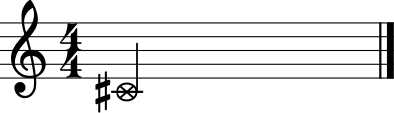

In [28]:
for x in s.getElementsByGroup('black_key'):
    x.notehead = 'circle-x'

s.show()

In [29]:
n.activeSite

<music21.stream.Stream empty_stream>

In [30]:
t = stream.Stream()
t.id = 'new_stream'
t.insert(4.0, n)

n.activeSite

<music21.stream.Stream new_stream>

In [31]:
n.activeSite = s
n.activeSite

<music21.stream.Stream empty_stream>

In [32]:
q = stream.Stream(id='unrelated_stream')
n.activeSite = q

SitesException: activeSite cannot be set for object <music21.note.Note C#> not in the Stream <music21.stream.Stream unrelated_stream>

In [33]:
m = note.Rest()
m.activeSite is None

True

In [34]:
n.activeSite = s
n.offset

0.0

In [35]:
n.activeSite = t
n.offset

4.0

In [36]:
n.activeSite = s
n.offset = 2.0
n.activeSite = t
n.activeSite = s
n.offset

2.0

In [37]:
n2 = note.Note('G-2')
n2.offset = 20.0
s.insert(n2)
n2.activeSite

<music21.stream.Stream empty_stream>

In [38]:
n2.offset

20.0

In [39]:
s = stream.Stream()
d = note.Note('D4')
e = note.Note('E4')
s.insert(0.0, d)
s.insert(0.0, e)
s.show('text')

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


In [40]:
d.priority

0

In [41]:
e.priority = -1
s.show('text')

{0.0} <music21.note.Note E>
{0.0} <music21.note.Note D>


In [42]:
e.priority = 0
s.show('text')

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


In [43]:
tc = clef.TrebleClef()
s.insert(0.0, tc)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


In [44]:
(tc.priority, d.priority, e.priority)

(0, 0, 0)

In [45]:
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)

(0, 20, 20)

In [46]:
(clef.TrebleClef.classSortOrder, note.Note.classSortOrder)

(0, 20)

In [47]:
clef.TrebleClef.classSortOrder = 25
note.Note.classSortOrder = 10
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)

(25, 10, 10)

In [48]:
clef.TrebleClef.classSortOrder = 0
note.Note.classSortOrder = 20
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)

(0, 20, 20)